# XPS utilities

Several helper methods exist for XPS measurements, beyond the general [fitting functions](./6_data_fitting.ipynb).

In [2]:
# Import packages
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
import peaks as pks
import os

# Set default options
xr.set_options(cmap_sequential='Purples', keep_attrs=True)
%matplotlib inline
%config InlineBackend.figure_format='retina'

# File path of the example data
fpath = os.getenv('PEAKS_EXAMPLE_DATA_PATH')
pks.opts.FileIO.path = fpath
pks.opts.FileIO.ext = 'nxs'

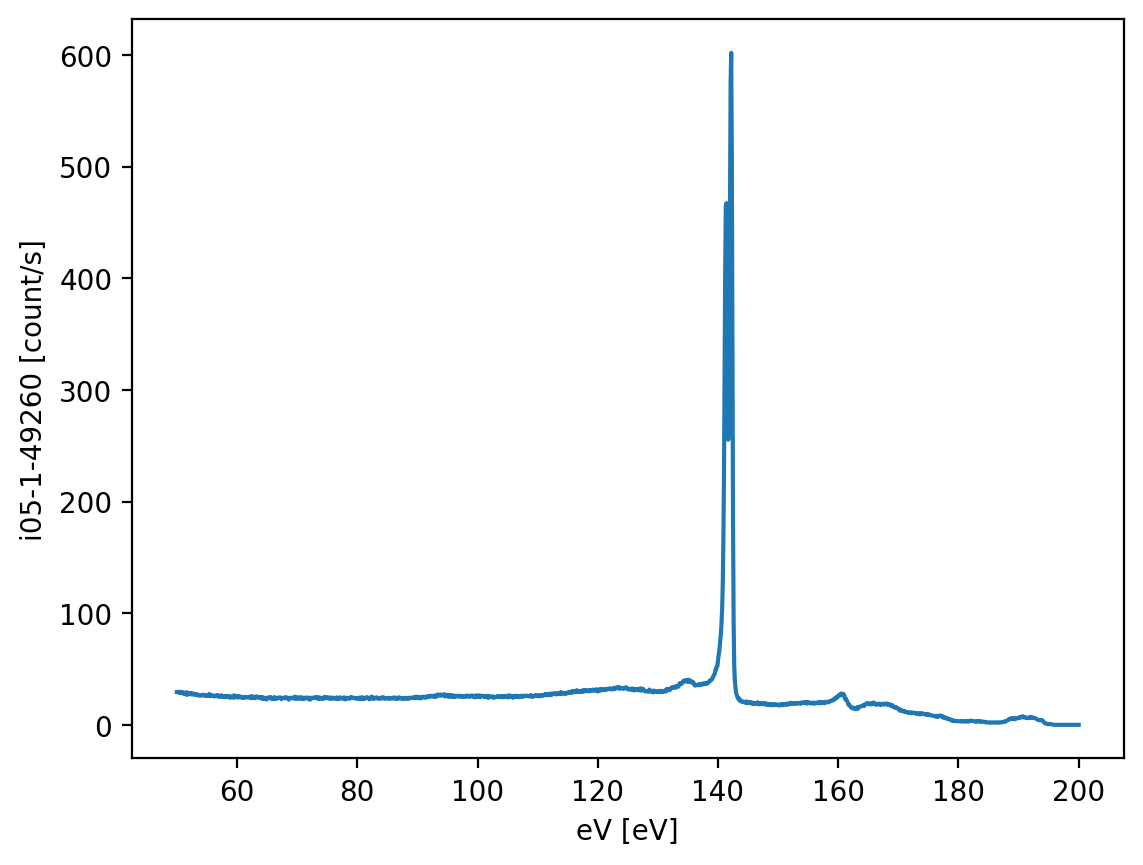

In [3]:
# Load some example data (a TiSe2 sample measured at 200 eV)
spectrum = pks.load('i05-1-49260.nxs').DOS()
spectrum.plot()

The XPS utilities can be accessed via the `peaks.xps` module.

In [4]:
# Import the xps module
from peaks import xps

## Core level energies
A dictionary of approximate core level binding energies is avaiable in `peaks.xps.CoreLevels.BE`. The data is based on https://userweb.jlab.org/~gwyn/ebindene.html, and no guarantee of accuracy is provided.

In [5]:
xps.CoreLevels.BE['Se']

{'1s': 12658,
 '2s': 1652,
 '2p1/2': 1474.3,
 '2p3/2': 1433.9,
 '3s': 229.6,
 '3p1/2': 166.5,
 '3p3/2': 160.7,
 '3d3/2': 55.5,
 '3d5/2': 54.6}

### Lookup by element
A quick lookup can by made by element(s). By default, the binding energy is returned, and if a photon energy is passed via the `hv` argument, the corresponding kinetic energy is also given. Optionally, the kinetic energy expected for core levels excited by higher-order light can also be provided by setting the `max_order` argument.

In [6]:
xps.CoreLevels.by_element(['Ti','Se'], hv=200)

,1s,2s,2p1/2,2p3/2,3s,3p1/2,3p3/2,3d3/2,3d5/2
Se,12658.0,1652.0,1474.3,1433.9,229.6,166.5,160.7,55.5,54.6
Se (KE@hv=200eV),,,,,,29.15,34.95,140.15,141.05
Ti,4966.0,560.9,460.2,453.8,58.7,32.6,32.6,,
Ti (KE@hv=200eV),,,,,136.95,163.05,163.05,,


### Search by energy
In addition, core levels can also be searched by binding energy (if no `hv` argument is supplied) or by kinetic energy (if `hv` supplied, also optionally considering higher-order light):

In [7]:
xps.CoreLevels.by_energy(140, hv=200, tol=1, max_order=2)

,1s,3d3/2,4s,4p1/2,4d3/2,5s
Li (KE@hv=200eV),140.95,,,,,
Nb (KE@hv=200eV),,,139.25,,,
Pd (KE@hv=200eV),,,,139.95,,
Se (KE@hv=200eV),,140.15,,,,
Tm (KE@hv=200eV),,,,,,140.95
"W (KE@hv=200eV, 2nd order)",,,,,139.75,


### Plotting core level energies
A helper function allows plotting the expected core level (binding/kinetic) energies. These can be plotted on an existing plot if specified, and optionally limited to a finite energy range. 

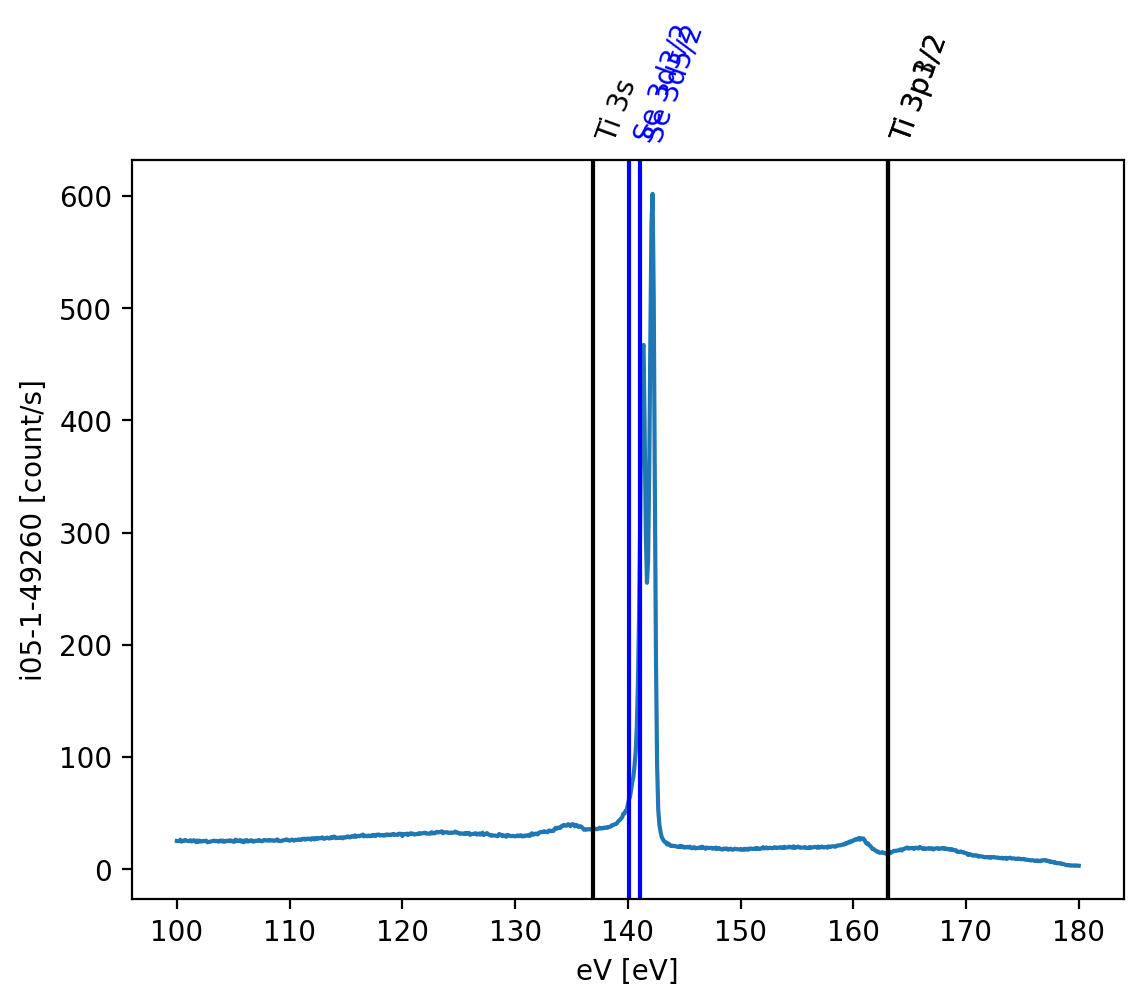

In [8]:
spectrum.sel(eV=slice(100,180)).plot()
ax=plt.gca()
xps.CoreLevels.plot(['Ti','Se'], ax=ax, hv=200, eV=slice(125,175))

## Cross sections
A :class:`xarray.DataTree` contining core level cross section data from https://vuo.elettra.eu/services/elements/WebElements.html is available in `peaks:xps.CoreLevels.xc`

Text(210, 0.2, 'hv=200 eV')

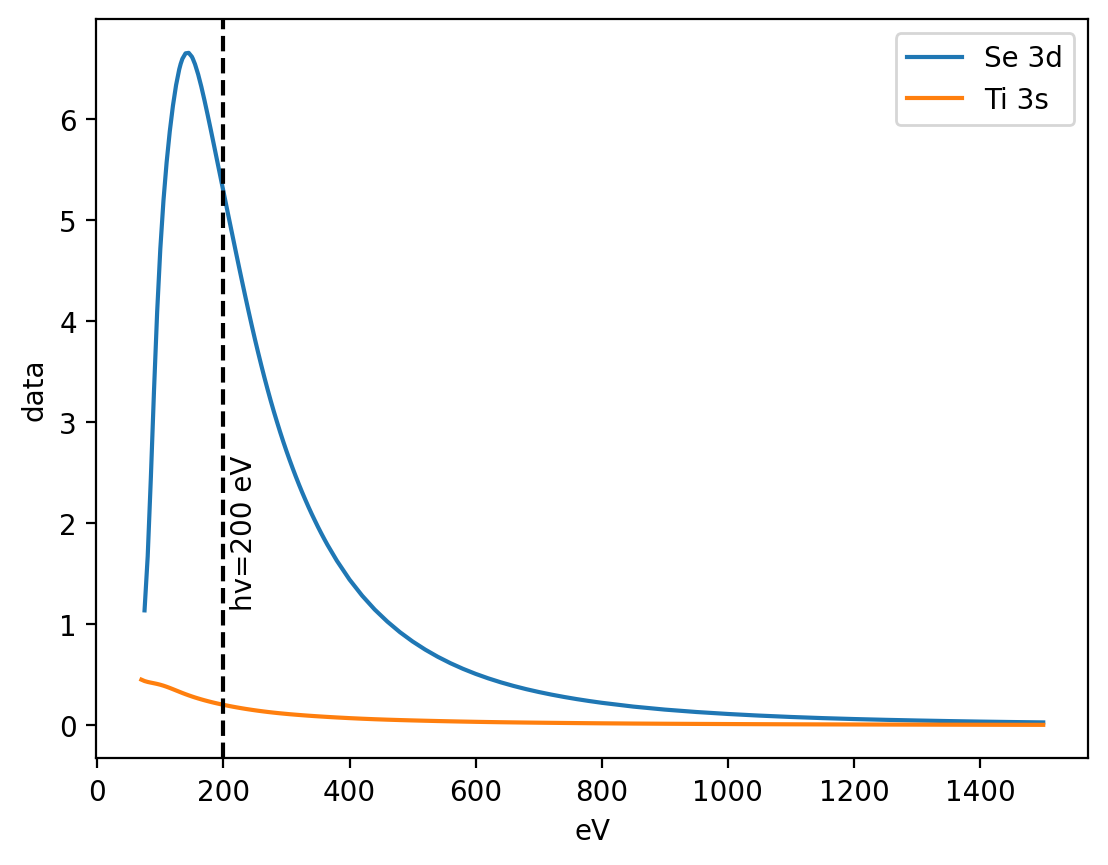

In [9]:
xps.CoreLevels.xc.Se['3d'].data.plot(label='Se 3d')
xps.CoreLevels.xc.Ti['3s'].data.plot(label='Ti 3s')
plt.legend()
plt.axvline(200, color='k', linestyle='--')
plt.text(210, 0.2, 'hv=200 eV', rotation=90, verticalalignment='bottom', horizontalalignment='left', transform=plt.gca().get_xaxis_transform())

Our usual :class:`xarray.DataTree` methods can be used:

In [10]:
xps.CoreLevels.xc.Se.view()

Se
├── 2p
├── 3s
├── 3p
├── 3d
├── 4s
└── 4p



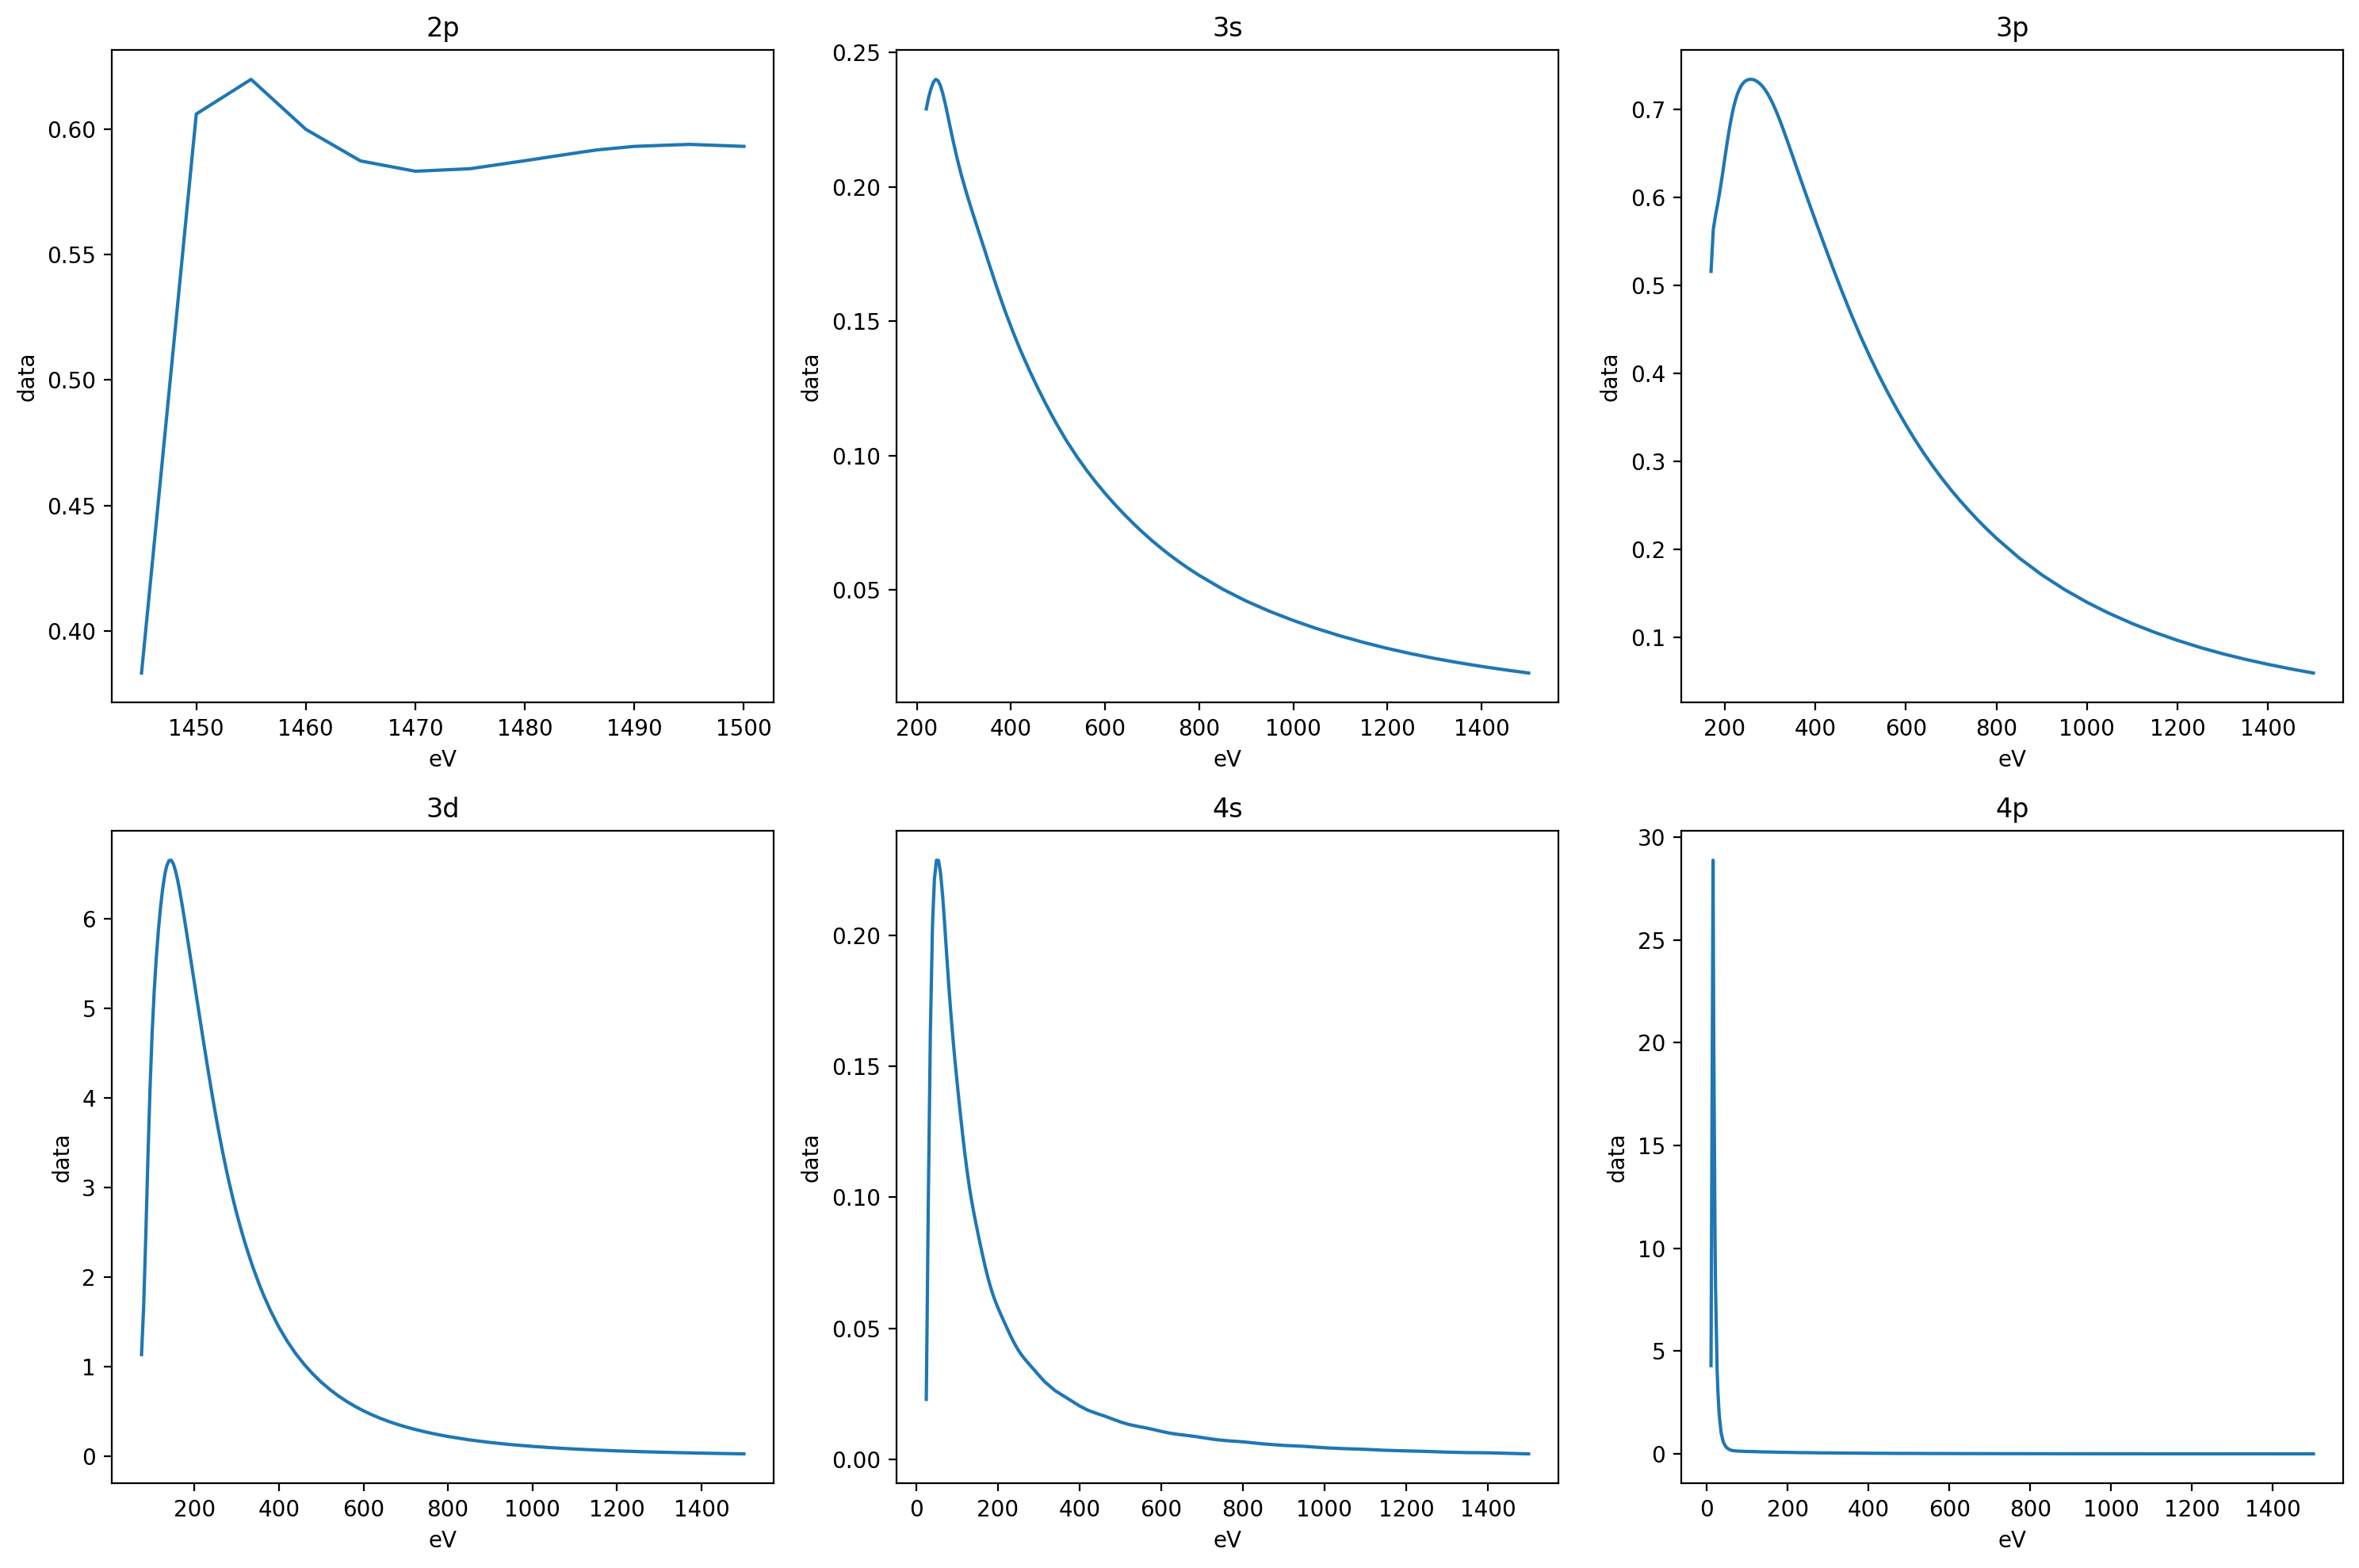

In [11]:
xps.CoreLevels.xc.Se.plot_grid()

## Interactive view
An interactive periodic table view of the core level kinetic/binding energies can also be shown with the `.ptab` accessor. Hover above an element to get some basic information, including the core level energies.

In [78]:
xps.CoreLevels.ptab(hv=200)

Loading BokehJS ...